Author: *Ana Paula Bernardo*

Linkedin: https://www.linkedin.com/in/ana-paula-sbernardo/

GitHub: https://github.com/anaapbernardo

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
url = 'https://github.com/anaapbernardo/Bootcamp_DataScience/blob/main/Files%20-%20Bootcamp%20Data%20Science/PENSE_AMOSTRA2_ALUNO.CSV?raw=true'

In [34]:
df = pd.read_csv(url, sep=';', thousands='.', decimal=',')
df

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2015,76,5,1,2,4,12,8,8,1,...,521,5,447.815539,1,2,4,1,16552,371,117
16552,2015,76,5,1,1,1,15,7,5,1,...,521,5,592.507440,1,2,4,1,16553,371,117
16553,2015,76,5,1,1,4,13,11,7,1,...,521,5,401.131512,1,2,4,1,16554,371,117
16554,2015,76,5,1,1,4,14,8,6,1,...,521,5,442.718091,1,2,4,1,16555,371,117


In [35]:
df.isnull().sum()

ANOPESQ    0
PAIS       0
REGEOGR    0
VB00004    0
VB01001    0
          ..
V0008      0
V0041      0
aluno      0
escola     0
turma      0
Length: 181, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [37]:
df.describe()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
count,16556.0,16556.0,16556.000000,16556.0,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,...,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,2015.0,76.0,3.012443,1.0,1.499456,2.698417,14.095917,6.529778,6.497886,1.177821,...,3095.650459,3.012443,1144.868891,1.051401,1.252174,2.671781,-0.341024,8278.500000,186.053938,320.036241
std,0.0,0.0,1.414031,0.0,0.500015,3.868506,2.127947,4.210372,4.016313,2.542142,...,1443.400564,1.414031,1133.068244,0.220822,0.434274,0.872426,1.282048,4779.449864,107.358284,186.022453
min,2015.0,76.0,1.000000,1.0,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,...,311.000000,1.000000,24.213647,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
25%,2015.0,76.0,2.000000,1.0,1.000000,1.000000,12.000000,4.000000,5.000000,1.000000,...,2121.000000,2.000000,404.965321,1.000000,1.000000,2.000000,-1.000000,4139.750000,97.000000,159.000000
50%,2015.0,76.0,3.000000,1.0,1.000000,2.000000,14.000000,6.000000,6.000000,1.000000,...,3123.000000,3.000000,746.438889,1.000000,1.000000,2.000000,-1.000000,8278.500000,184.000000,316.000000
75%,2015.0,76.0,4.000000,1.0,2.000000,4.000000,16.000000,9.000000,8.000000,1.000000,...,4123.000000,4.000000,1510.244112,1.000000,2.000000,4.000000,1.000000,12417.250000,276.000000,475.000000
max,2015.0,76.0,5.000000,1.0,2.000000,99.000000,19.000000,99.000000,99.000000,99.000000,...,5223.000000,5.000000,17888.589630,2.000000,2.000000,4.000000,4.000000,16556.000000,371.000000,653.000000


In [38]:
df.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


### **Evaluating the color/race distribuition between the students**

VB01002	Qual é a sua cor ou raça?

1	Branca

2	Preta

3	Amarela

4	Parda

5	Indígena

99	Não informado

In [39]:
frequency = df['VB01002'].value_counts()
frequency

4     6726
1     6575
2     1939
3      712
5      581
99      23
Name: VB01002, dtype: int64

In [40]:
percentage = (df['VB01002'].value_counts(normalize = True) * 100).round(2)
percentage

4     40.63
1     39.71
2     11.71
3      4.30
5      3.51
99     0.14
Name: VB01002, dtype: float64

In [41]:
answers = {1: 'White',
           2: 'Black',
           3: 'Yellow (Asian descendants)',
           4: 'Brown',
           5: 'Indian',
           99: 'Not informed'
          }

freq_distribuition = pd.DataFrame({'Frequency': frequency, 'Percentage': percentage})
freq_distribuition.rename(index = answers, inplace = True)
freq_distribuition.rename_axis('What is your color or race?', axis=1, inplace = True)
freq_distribuition

What is your color or race?,Frequency,Percentage
Brown,6726,40.63
White,6575,39.71
Black,1939,11.71
Yellow (Asian descendants),712,4.30
Indian,581,3.51
Not informed,23,0.14


<AxesSubplot:title={'center':'Frequency distribuition'}, xlabel='Color', ylabel='Frequency'>

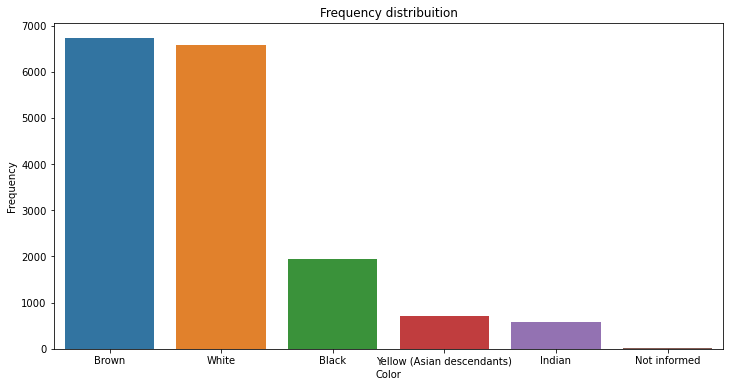

In [42]:
ax = sns.barplot(x = freq_distribuition.index, y = 'Frequency', data = freq_distribuition)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribuition')
ax.set_xlabel('Color')
ax

### **Evaluating the eating habits**

In [43]:
df_dict = pd.read_excel('https://github.com/anaapbernardo/Bootcamp_DataScience/blob/main/Files%20-%20Bootcamp%20Data%20Science/Dicionario_PENSE_Microdados_AMOSTRA2.xls?raw=true')
def get_question_description(colum_name) -> dict:
    
    return_dict = dict()

    description_row = df_dict.query(f'VARIÁVEL == "{colum_name}"')['QUESTIONÁRIO DO ALUNO']
    return_dict['Pergunta'] = description_row.values[0]
   
    values = list()
    index = description_row.index[0] + 1
    value = df_dict.iloc[index]['VARIÁVEL']
    
    # foi necessario verificar se o primeiro caracter não é '-' que é utilizado na representação do -1
    while str(value)[0].isnumeric() or str(value)[0] == '-':
        values.append([value, df_dict.iloc[index]['QUESTIONÁRIO DO ALUNO']])
        index += 1
        value = df_dict.iloc[index]['VARIÁVEL']
    return_dict['Descrição'] = dict(values)
    
    return return_dict

In [44]:
get_question_description('VB01002')

{'Pergunta': 'Qual é a sua cor ou raça?',
 'Descrição': {'1': 'Branca',
  '2': 'Preta',
  '3': 'Amarela',
  '4': 'Parda',
  '5': 'Indígena',
  99: 'Não informado'}}

- Healthy eating markers

In [46]:
get_question_description('VB02001')

{'Pergunta': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu feijão?',
 'Descrição': {'1': 'Não comi feijão nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias ',
  '3': '2 dias nos últimos 7 dias ',
  '4': '3 dias nos últimos 7 dias ',
  '5': '4 dias nos últimos 7 dias ',
  '6': '5 dias nos últimos 7 dias ',
  '7': '6 dias nos últimos 7 dias ',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [47]:
get_question_description('VB02004A')

{'Pergunta': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu pelo menos um tipo de legume ou verdura? Exemplos: alface, abóbora, brócolis, cebola, cenoura, chuchu, couve, espinafre, pepino, tomate etc. Não inclua batata e aipim (mandioca/macaxeira).',
 'Descrição': {'1': 'Não comi nenhum tipo de salada crua, legume ou verdura cozidos nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [48]:
get_question_description('VB02011')

{'Pergunta': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu frutas frescas ou salada de frutas? ',
 'Descrição': {'1': 'Não comi frutas frescas ou salada de frutas nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

- Not healthy eating markers

In [51]:
get_question_description('VB02002')

{'Pergunta': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu salgados fritos? Exemplo: batata frita (sem contar a batata de pacote) ou salgados fritos como coxinha de galinha, quibe frito, pastel frito, acarajé etc.',
 'Descrição': {'1': 'Não comi salgados fritos nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [52]:
get_question_description('VB02010')

{'Pergunta': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu guloseimas (doces, balas, chocolates, chicletes, bombons ou pirulitos)?',
 'Descrição': {'1': 'Não comi guloseimas nos últimos 7 dias (0 dia)',
  '2': '1dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [53]:
get_question_description('VB02013')

{'Pergunta': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você tomou refrigerante?',
 'Descrição': {'1': 'Não tomei refrigerante nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [54]:
get_question_description('VB02022')

{'Pergunta': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu alimentos industrializados/ultraprocessados salgados, como hambúrguer, presunto, mortadela, salame, linguiça, salsicha, macarrão instantâneo, salgadinho de pacote, biscoitos salgados?',
 'Descrição': {'1': 'Não comi alimentos industrializados/ultraprocessados salgados nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [55]:
get_question_description('VB02023')

{'Pergunta': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu em restaurantes fast food, tais como lanchonetes, barracas de cachorro quentes, pizzaria etc?',
 'Descrição': {'1': 'Não comi em restaurantes fast food nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

- Hungry

In [57]:
get_question_description('VB02024')

{'Pergunta': 'NOS ÚLTIMOS 30 DIAS, com que frequência você ficou com fome por não ter comida suficiente em sua casa?',
 'Descrição': {'1': 'Nunca',
  '2': 'Raramente',
  '3': 'Às vezes',
  '4': 'Na maior parte das vezes',
  '5': 'Sempre',
  99: 'Não informado'}}

### Cross frequency

In [67]:
# Hungry

respostas = {1: 'Never',
             2: 'Rarely',
             3: 'Sometimes',
             4: 'Most of the time',
             5: 'Always',
             99: 'Not informed'
            }

frequencia_cruzada = pd.crosstab(df["VB02024"], df["VB01002"], normalize = 'columns') * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = answers, inplace = True)
frequencia_cruzada.round(2)

VB01002,White,Black,Yellow (Asian descendants),Brown,Indian,Not informed
VB02024,,,,,,
Never,78.31,74.16,77.53,77.82,75.04,69.57
Rarely,10.80,11.35,10.81,10.57,11.36,8.70
Sometimes,8.15,10.31,8.29,8.77,9.64,8.70
Most of the time,1.38,1.60,1.69,1.56,2.24,4.35
Always,1.20,2.22,1.40,1.17,1.38,0.00
Not informed,0.15,0.36,0.28,0.10,0.34,8.70


In [ ]:
# Beans



In [68]:
respostas = {1: 'None',
             2: '1 day',
             3: '2 days',
             4: '3 days',
             5: '4 days',
             6: '5 days',
             7: '6 days',
             8: 'Everyday',
             99: 'Not informed'
            }

frequencia_cruzada = pd.crosstab(df["VB02001"], df["VB01002"], normalize = 'columns') * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = answers, inplace = True)
frequencia_cruzada.round(2)

VB01002,White,Black,Yellow (Asian descendants),Brown,Indian,Not informed
VB02001,,,,,,
None,12.99,10.37,11.80,10.02,14.63,13.04
1 day,8.85,9.54,8.43,8.19,7.75,8.70
2 days,8.40,7.48,7.72,7.69,4.65,4.35
3 days,8.70,8.41,8.15,8.99,9.47,0.00
4 days,8.47,6.70,6.32,7.24,7.57,0.00
5 days,8.17,6.29,8.29,7.98,6.20,4.35
6 days,7.77,6.29,8.43,6.84,7.23,8.70
Everyday,36.49,44.61,40.87,42.80,42.17,56.52
Not informed,0.17,0.31,0.00,0.24,0.34,4.35


In [69]:
# Vegetables 

respostas = {1: 'None',
             2: '1 day',
             3: '2 days',
             4: '3 days',
             5: '4 days',
             6: '5 days',
             7: '6 days',
             8: 'Everyday',
             99: 'Not informed'
            }

frequencia_cruzada = pd.crosstab(df["VB02004A"], df["VB01002"], normalize = 'columns') * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = answers, inplace = True)
frequencia_cruzada.round(2)

VB01002,White,Black,Yellow (Asian descendants),Brown,Indian,Not informed
VB02004A,,,,,,
None,16.61,19.86,16.71,17.45,18.76,17.39
1 day,10.36,13.15,11.66,12.15,12.05,21.74
2 days,10.21,11.29,10.96,11.15,11.36,0.00
3 days,10.52,10.62,10.96,11.49,10.67,4.35
4 days,9.66,7.32,8.43,8.98,7.92,13.04
5 days,7.63,6.70,5.90,7.60,7.23,4.35
6 days,6.68,5.72,7.30,5.62,5.68,4.35
Everyday,28.14,25.06,27.95,25.41,25.65,30.43
Not informed,0.20,0.26,0.14,0.15,0.69,4.35


In [70]:
# Fuits

respostas = {1: 'None',
             2: '1 day',
             3: '2 days',
             4: '3 days',
             5: '4 days',
             6: '5 days',
             7: '6 days',
             8: 'Everyday',
             99: 'Not informed'
            }

frequencia_cruzada = pd.crosstab(df["VB02011"], df["VB01002"], normalize = 'columns') * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = answers, inplace = True)
frequencia_cruzada.round(2)

VB01002,White,Black,Yellow (Asian descendants),Brown,Indian,Not informed
VB02011,,,,,,
None,18.57,19.75,20.08,20.03,19.79,21.74
1 day,12.62,13.15,13.90,12.91,9.98,21.74
2 days,12.53,12.22,11.10,13.31,14.63,8.70
3 days,11.94,11.86,11.80,12.30,8.43,21.74
4 days,9.60,7.79,8.99,8.82,8.78,4.35
5 days,8.02,7.79,7.72,7.43,8.09,4.35
6 days,5.75,5.52,5.34,5.37,8.26,4.35
Everyday,20.79,21.51,20.93,19.67,21.34,13.04
Not informed,0.18,0.41,0.14,0.18,0.69,0.00


In [71]:
# Salgados fritos

respostas = {1: 'None',
             2: '1 day',
             3: '2 days',
             4: '3 days',
             5: '4 days',
             6: '5 days',
             7: '6 days',
             8: 'Everyday',
             99: 'Not informed'
            }

frequencia_cruzada = pd.crosstab(df["VB02002"], df["VB01002"], normalize = 'columns') * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = answers, inplace = True)
frequencia_cruzada.round(2)

VB01002,White,Black,Yellow (Asian descendants),Brown,Indian,Not informed
VB02002,,,,,,
None,30.90,32.96,32.87,33.85,33.39,30.43
1 day,22.05,20.37,19.80,21.02,22.38,17.39
2 days,16.68,13.56,15.87,15.82,14.63,13.04
3 days,11.88,11.24,10.96,10.12,8.26,8.70
4 days,6.04,5.93,6.74,5.96,5.51,4.35
5 days,4.06,3.97,3.37,4.30,4.82,0.00
6 days,2.02,2.37,2.11,2.13,2.93,4.35
Everyday,6.16,9.18,8.15,6.65,7.57,13.04
Not informed,0.20,0.41,0.14,0.15,0.52,8.70


In [72]:
# Candies

respostas = {1: 'None',
             2: '1 day',
             3: '2 days',
             4: '3 days',
             5: '4 days',
             6: '5 days',
             7: '6 days',
             8: 'Everyday',
             99: 'Not informed'
            }

frequencia_cruzada = pd.crosstab(df["VB02010"], df["VB01002"], normalize = 'columns') * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = answers, inplace = True)
frequencia_cruzada.round(2)

VB01002,White,Black,Yellow (Asian descendants),Brown,Indian,Not informed
VB02010,,,,,,
None,10.87,13.25,12.36,12.36,14.29,4.35
1 day,14.45,14.23,14.04,14.41,14.29,17.39
2 days,14.21,13.82,11.24,14.21,12.05,4.35
3 days,13.90,10.78,12.36,12.53,13.08,13.04
4 days,10.36,8.35,9.13,9.81,8.26,8.70
5 days,8.09,7.17,8.57,7.89,9.29,8.70
6 days,5.90,5.98,6.32,5.92,5.34,4.35
Everyday,21.98,26.10,25.84,22.70,22.72,34.78
Not informed,0.24,0.31,0.14,0.16,0.69,4.35


In [73]:
# Soda

respostas = {1: 'None',
             2: '1 day',
             3: '2 days',
             4: '3 days',
             5: '4 days',
             6: '5 days',
             7: '6 days',
             8: 'Everyday',
             99: 'Not informed'
            }

frequencia_cruzada = pd.crosstab(df["VB02013"], df["VB01002"], normalize = 'columns') * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = answers, inplace = True)
frequencia_cruzada.round(2)

VB01002,White,Black,Yellow (Asian descendants),Brown,Indian,Not informed
VB02013,,,,,,
None,19.82,18.21,18.96,19.22,18.93,21.74
1 day,16.93,17.02,18.12,17.32,19.62,8.70
2 days,16.32,15.16,15.59,16.90,17.38,13.04
3 days,12.00,12.84,11.10,13.59,12.22,17.39
4 days,8.53,8.41,10.11,8.67,7.92,13.04
5 days,6.97,6.81,7.72,6.54,5.51,4.35
6 days,4.90,5.21,4.21,4.56,2.93,8.70
Everyday,14.42,15.88,14.19,13.05,14.97,13.04
Not informed,0.12,0.46,0.00,0.13,0.52,0.00


In [74]:
# Industrialized food

respostas = {1: 'None',
             2: '1 day',
             3: '2 days',
             4: '3 days',
             5: '4 days',
             6: '5 days',
             7: '6 days',
             8: 'Everyday',
             99: 'Not informed'
            }

frequencia_cruzada = pd.crosstab(df["VB02022"], df["VB01002"], normalize = 'columns') * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = answers, inplace = True)
frequencia_cruzada.round(2)

VB01002,White,Black,Yellow (Asian descendants),Brown,Indian,Not informed
VB02022,,,,,,
None,14.40,19.19,16.71,17.28,19.10,17.39
1 day,14.19,16.40,14.61,16.32,14.46,4.35
2 days,15.12,13.25,13.20,14.32,12.56,21.74
3 days,13.79,13.10,12.92,13.11,15.15,8.70
4 days,10.94,9.54,10.11,9.41,7.92,13.04
5 days,8.50,6.50,8.15,8.36,6.37,4.35
6 days,6.02,4.85,5.34,5.38,7.06,0.00
Everyday,16.84,16.61,18.82,15.55,16.87,13.04
Not informed,0.20,0.57,0.14,0.27,0.52,17.39


In [77]:
# Fast food

respostas = {1: 'None',
             2: '1 day',
             3: '2 days',
             4: '3 days',
             5: '4 days',
             6: '5 days',
             7: '6 days',
             8: 'Everyday',
             99: 'Not informed'
            }

frequencia_cruzada = pd.crosstab(df["VB02023"], df["VB01002"], normalize = 'columns') * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = answers, inplace = True)
frequencia_cruzada.round(2)

VB01002,White,Black,Yellow (Asian descendants),Brown,Indian,Not informed
VB02023,,,,,,
None,50.24,55.29,50.98,54.40,52.50,56.52
1 day,21.84,18.51,21.07,19.86,21.34,13.04
2 days,11.24,10.88,12.08,11.08,10.84,17.39
3 days,6.74,5.72,6.60,5.78,6.20,0.00
4 days,3.57,3.09,2.81,3.15,3.27,4.35
5 days,2.37,1.65,2.53,1.96,1.72,4.35
6 days,1.38,1.65,0.84,1.38,2.24,0.00
Everyday,2.48,2.78,2.81,2.16,1.55,0.00
Not informed,0.14,0.41,0.28,0.22,0.34,4.35
